In [123]:
#21BAI1869
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [124]:
#21BAI1869
df=pd.read_csv('/content/Mall_Customers_set2.csv')
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [125]:
#21BAI1869
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [126]:
#21BAI1869    we are not pre processing the data much as data doesn't have any issues or null values we just drop the customer id column
df=df.dropna()
df.drop(columns='CustomerID',axis=1,inplace=True)
df.head

<bound method NDFrame.head of      Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]>

In [127]:
#21BAI1869
x=df.iloc[:,[2,3]].values

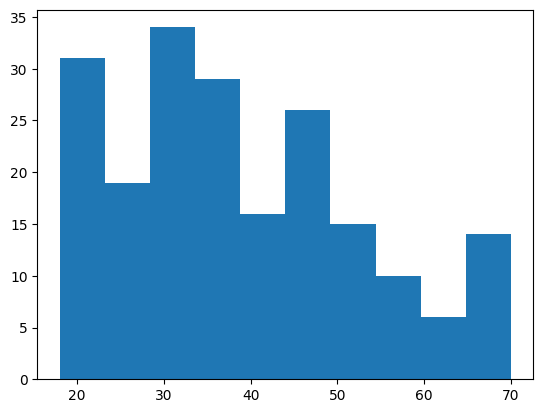

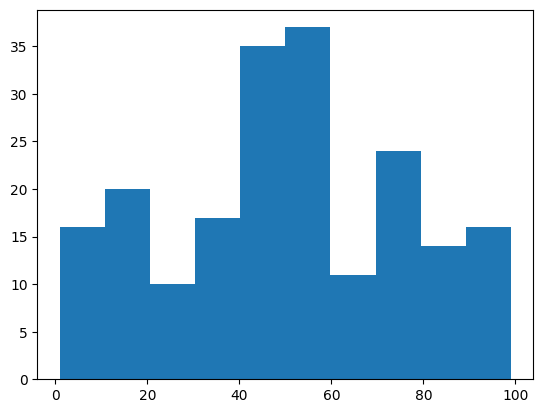

In [128]:
#21BAI1869
plt.hist(df['Age'])
plt.show()

plt.hist(df['Spending Score (1-100)'])
plt.show()


In [129]:
print(len(df['Gender']))

200


In [130]:
#21BAI1869
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [131]:
#21BAI1869    this is just another way of encoding we will use originally be using label encoding
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[0])],remainder ='passthrough')
df = np.array(ct.fit_transform(df))
"""

"\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[0])],remainder ='passthrough')\ndf = np.array(ct.fit_transform(df))\n"

In [135]:
#21BAI1869
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
y_means = kmeans.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


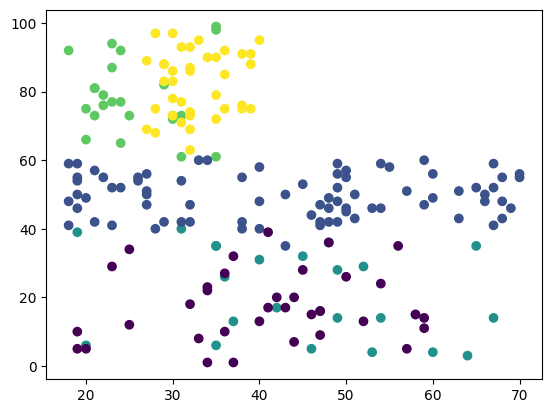

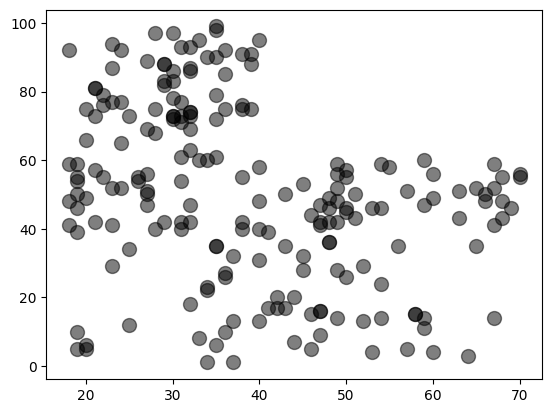

In [136]:
#21BAI1869
# Example visualization using scatter plot
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=y_means)
plt.show()
centers = kmeans.cluster_centers_
plt.scatter(df['Age'], df['Spending Score (1-100)'], c='black', s=100, alpha=0.5);

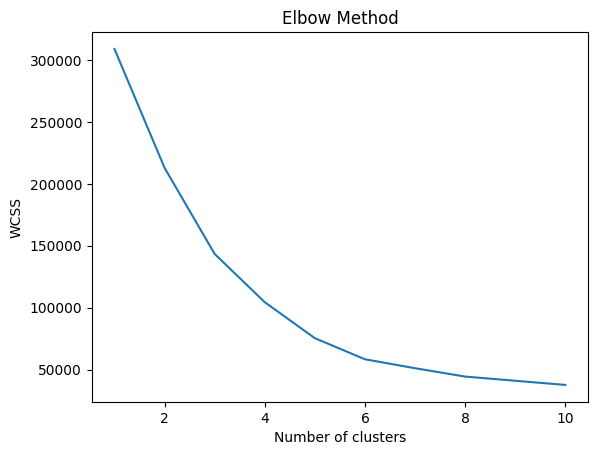

In [137]:
#21BAI1869
# we find optimal number of clusters using elbow method in K means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
